<a href="https://colab.research.google.com/github/arpithasc/animal-species-detection-/blob/main/Animal_Species_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip gdrive/My\Drive/AID/animal.zip

Archive:  gdrive/MyDrive/AID/animal.zip
   creating: animal_dataset/images/
   creating: animal_dataset/images/train/
  inflating: animal_dataset/images/train/1.jpg  
  inflating: animal_dataset/images/train/10.jpg  
  inflating: animal_dataset/images/train/1000.jpg  
  inflating: animal_dataset/images/train/1001.jpg  
  inflating: animal_dataset/images/train/1002.jpg  
  inflating: animal_dataset/images/train/1003.jpg  
  inflating: animal_dataset/images/train/1004.jpg  
  inflating: animal_dataset/images/train/1005.jpg  
  inflating: animal_dataset/images/train/1006.jpg  
  inflating: animal_dataset/images/train/1007.jpg  
  inflating: animal_dataset/images/train/1008.jpg  
  inflating: animal_dataset/images/train/1009.jpg  
  inflating: animal_dataset/images/train/101.jpg  
  inflating: animal_dataset/images/train/1010.jpg  
  inflating: animal_dataset/images/train/1011.jpg  
  inflating: animal_dataset/images/train/1012.jpg  
  inflating: animal_dataset/images/train/1013.jpg  
  in

In [ ]:
!pip install utils

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt
import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-230-g53efd07 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.7/78.2 GB disk)


In [ ]:
!python train.py --img 415 --batch 31 --epochs 101 --data coco128.yaml --weights yolov5s.pt --cache

2023-10-28 12:39:30.788100: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-28 12:39:30.788155: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-28 12:39:30.788193: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=101, batch_size=31, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project

In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 196 --conf 0.25 --source ../testpic.jpg

detect: weights=['runs/train/exp2/weights/best.pt'], source=../testpic.jpg, data=data/coco128.yaml, imgsz=[196, 196], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-230-g53efd07 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ --img-size [196, 196] must be multiple of max stride 32, updating to [224, 224]
image 1/1 /content/testpic.jpg: 224x224 1 dog, 5.4ms
Speed: 0.3ms pre-process, 5.4ms inference, 89.4ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/detect/exp5


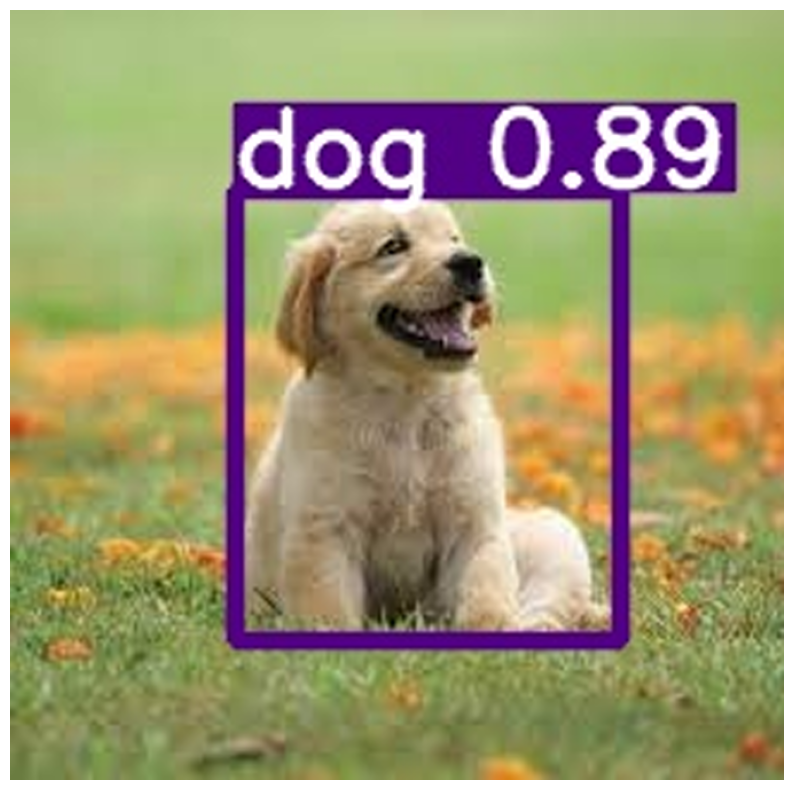

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("runs/detect/exp5/testpic.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()